In [33]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [34]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
connection = pymysql.connect(
    host = "localhost",
    user = "root",
    password = "nikhil",
    database = "superstore"
)
print("connection sucessfully")

connection sucessfully


In [36]:
query ="select *from orders limit 5"

In [37]:
df = pd.read_sql(query,connection)
print(df.head())

         order_Id  order_date   ship_date       ship_mode customer_Id  \
0  CA-2014-100293  2014-03-14  2014-03-18  Standard Class    NF-18475   
1  CA-2014-100328  2014-01-28  2014-02-03  Standard Class    JC-15340   
2  CA-2014-100363  2014-04-08  2014-04-15  Standard Class    JM-15655   
3  CA-2014-100391  2014-05-25  2014-05-29  Standard Class    BW-11065   
4  CA-2014-100678  2014-04-18  2014-04-22  Standard Class    KM-16720   

   Location_Id  
0          116  
1           18  
2          263  
3           18  
4           11  


C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1967870893.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1770185955.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data1 = pd.read_sql(query_place,connection)


,product_name,total_profits
0,Global Deluxe Steno Chair,-157.79
1,"Global Wood Trimmed Manager's Task Chair, Khaki",-106.10
2,"Global Geo Office Task Chair, Gray",-101.23
3,Motorola HK250 Universal Bluetooth Headset,-91.49
4,"Belkin 19"" Vented Equipment Shelf, Black",-81.85
5,"Premier Elliptical Ring Binder, Black",-80.35
6,Global Low Back Tilter Chair,-70.68
7,"Fellowes Strictly Business Drawer File, Letter...",-67.60
8,Tennsco Industrial Shelving,-67.51
9,"Lesro Sheffield Collection Coffee Table, End T...",-64.27


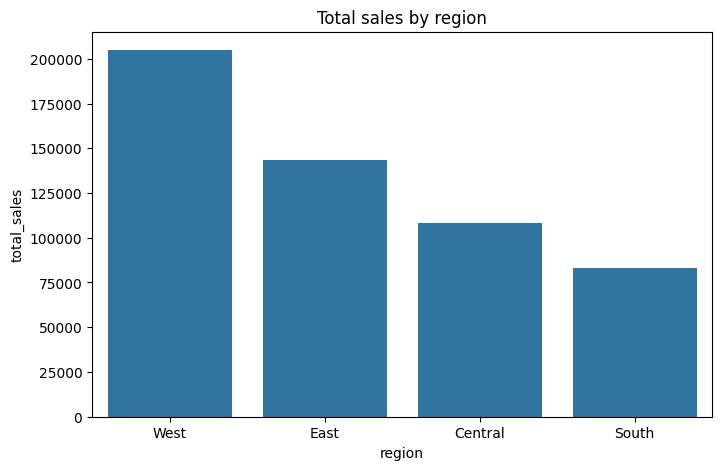

In [43]:
query_place = """
select
a.region,
round(sum(od.sales), 2) as total_sales,
round(sum(od.profit), 2) as total_profit,
sum(od.Quantity) as total_quantity
from order_details od
inner join orders o  on od.order_Id = o.order_Id
inner join address a on o.Location_Id = a.Location_Id
inner join product_d p on od.product_Id = p.product_Id
group by a.region
order by total_sales desc;
"""
df_data1 = pd.read_sql(query_place,connection)
display(df_data)
plt.figure(figsize = (8,5))
sns.barplot(data = df_data1,x ="region",y ="total_sales")
plt.title("Total sales by region")
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\2157241978.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data = pd.read_sql(query_profit,connection)


,product_name,total_profits
0,Global Deluxe Steno Chair,-157.79
1,"Global Wood Trimmed Manager's Task Chair, Khaki",-106.10
2,"Global Geo Office Task Chair, Gray",-101.23
3,Motorola HK250 Universal Bluetooth Headset,-91.49
4,"Belkin 19"" Vented Equipment Shelf, Black",-81.85
5,"Premier Elliptical Ring Binder, Black",-80.35
6,Global Low Back Tilter Chair,-70.68
7,"Fellowes Strictly Business Drawer File, Letter...",-67.60
8,Tennsco Industrial Shelving,-67.51
9,"Lesro Sheffield Collection Coffee Table, End T...",-64.27


C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\2157241978.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # adjust layout to prevent cutoff


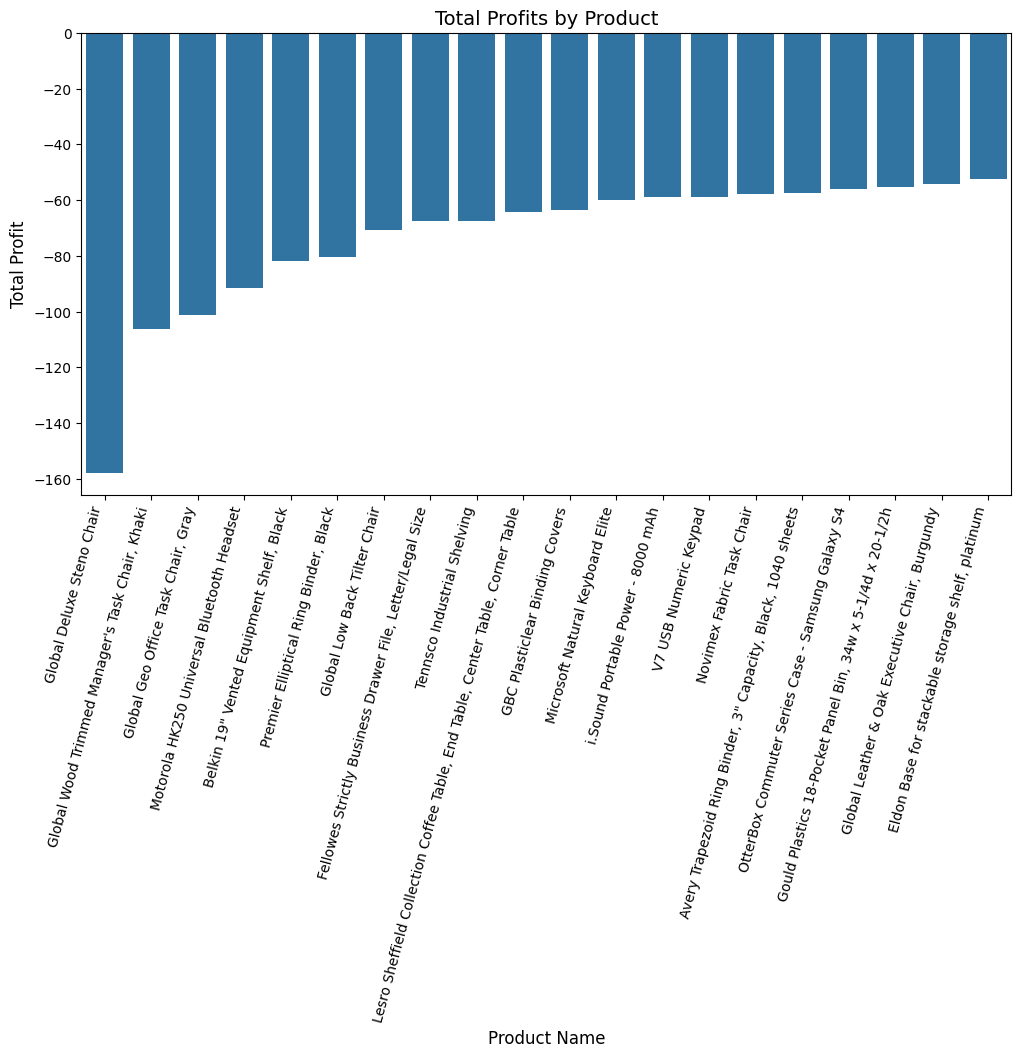

In [39]:
query_profit = """
select
p.product_name,
round(sum(od.profit), 2) as total_profits
from order_details od
join product_d p on od.product_Id = p.product_Id
group by p.product_name
order by total_profits asc
limit 20;
"""
df_data = pd.read_sql(query_profit,connection)
display(df_data)
plt.figure(figsize=(12,6))  # increase figure width
sns.barplot(data=df_data, x="product_name", y="total_profits")

plt.title("Total Profits by Product", fontsize=14)
plt.xticks(rotation=75, ha='right')  # rotate labels and align them
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.tight_layout()  # adjust layout to prevent cutoff
plt.show()


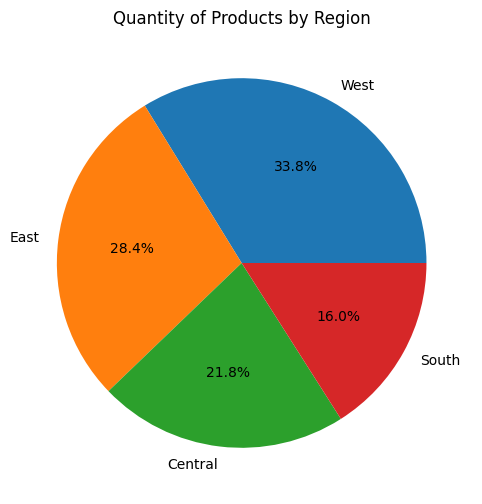

In [28]:
plt.figure(figsize=(6,6))
plt.pie(df_data1['total_quantity'], labels = df_data1['region'], autopct = "%1.1f%%")
plt.title('Quantity of Products by Region')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\3135275543.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cat = pd.read_sql(cat, connection)


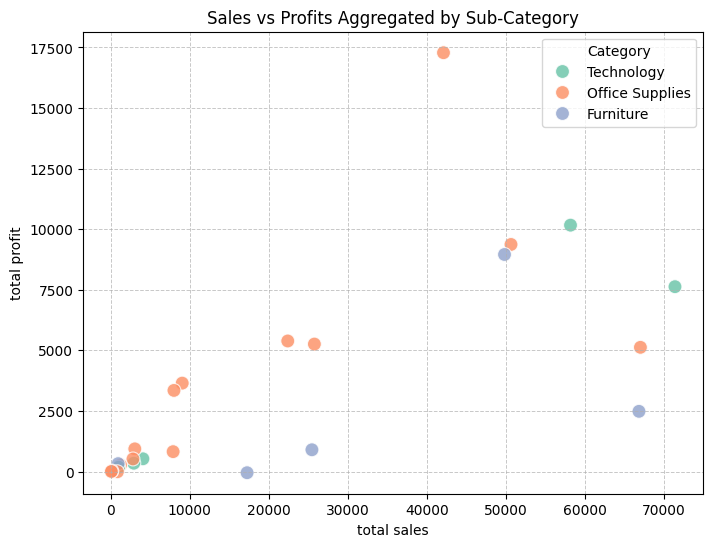

In [45]:
cat = """
select 
    p.Category,
    p.Sub_Category,
    round(sum(o.Sales), 2) as total_sales,
    round(sum(o.Profit), 2) as total_profit
from order_details o
join product_d p on o.Product_Id = p.Product_Id
group by p.Category, p.Sub_Category
order by total_sales desc;
"""
df_cat = pd.read_sql(cat, connection)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_cat,
    x='total_sales',
    y='total_profit',
    hue='Category',
    s=100,
    alpha=0.8,
    palette='Set2'
)
plt.grid(axis = "both", linestyle = "--", linewidth = 0.7, alpha = 0.7)
plt.title('Sales vs Profits Aggregated by Sub-Category')
plt.xlabel('total sales')
plt.ylabel('total profit')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1385024487.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_box = pd.read_sql(query, connection)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1385024487.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Segment', y='Profit', palette='coolwarm', showfliers=False)


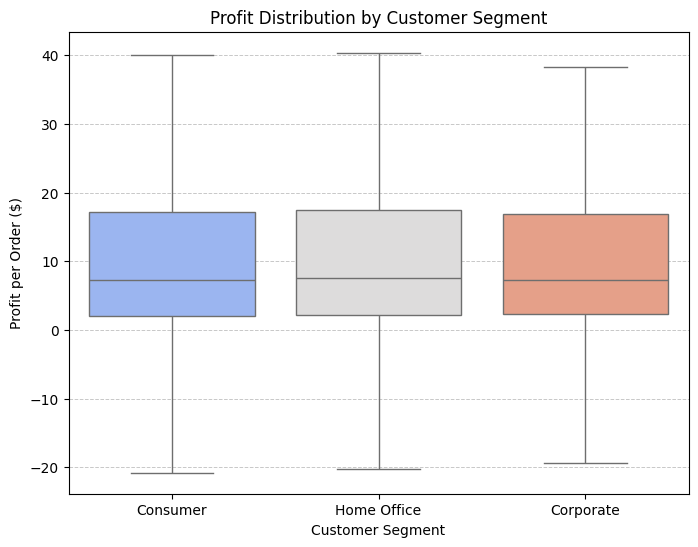

In [46]:
query = """
SELECT 
    c.Segment,
    od.Profit
FROM orders o 
JOIN order_details od ON o.Order_Id = od.Order_Id
JOIN customers c ON o.Customer_Id = c.Customer_Id;
"""
df_box = pd.read_sql(query, connection)
df_box['Profit'] = pd.to_numeric(df_box['Profit'])
df_box = df_box.dropna(subset=['Profit'])
plt.figure(figsize=(8,6))
sns.boxplot(data=df_box, x='Segment', y='Profit', palette='coolwarm', showfliers=False)
plt.title('Profit Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit per Order ($)')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1098656136.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_month = pd.read_sql(query, connection)


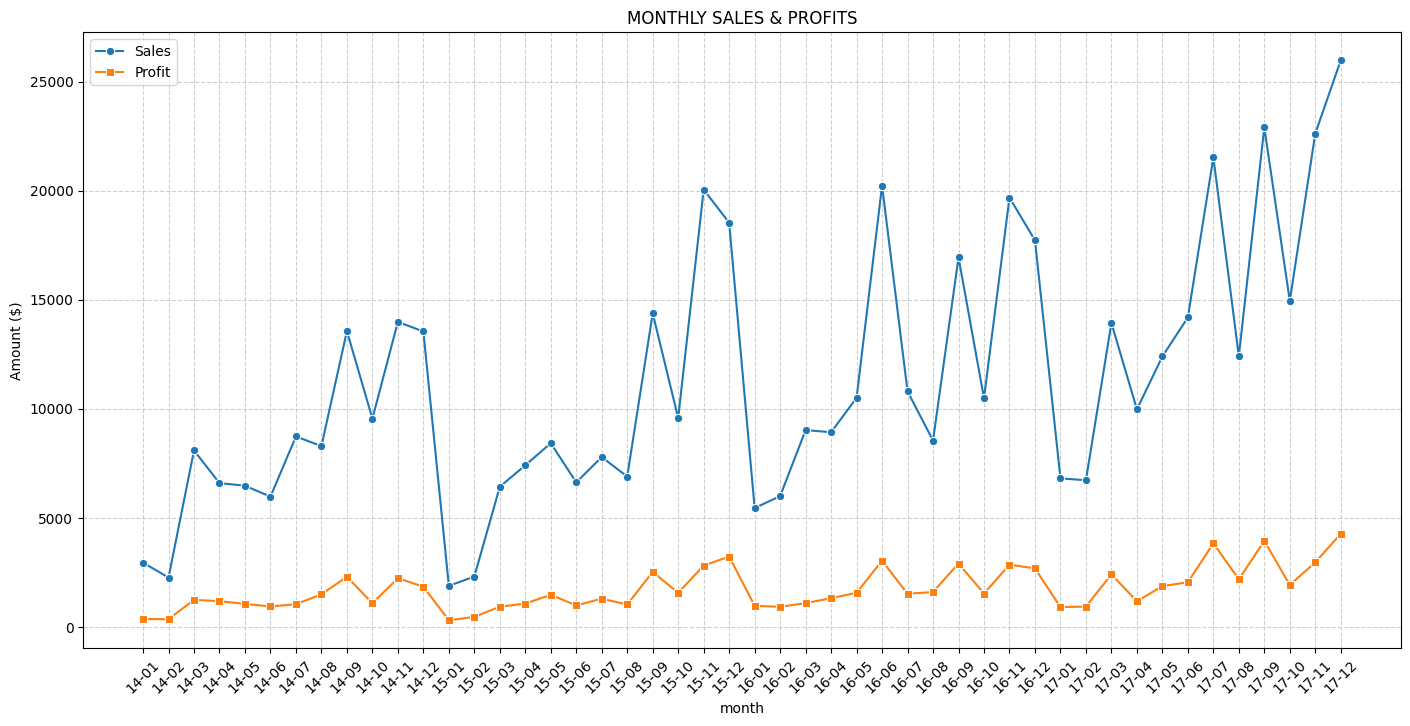

In [47]:
query = """
select
    date_format(o.order_date, '%y-%m') as month,
    round(sum(od.sales), 2) as total_sales,
    round(sum(od.profit), 2) as total_profit
from orders o
join order_details od ON o.order_Id = od.order_Id
group by month
order by month;
"""
df_month = pd.read_sql(query, connection)
plt.figure(figsize=(17,8))
sns.lineplot(data=df_month, x='month', y='total_sales', marker='o', label='Sales')
sns.lineplot(data=df_month, x='month', y='total_profit', marker='s', label='Profit')
plt.title('MONTHLY SALES & PROFITS')
plt.xlabel('month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1870426891.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_quarter = pd.read_sql(query, connection)


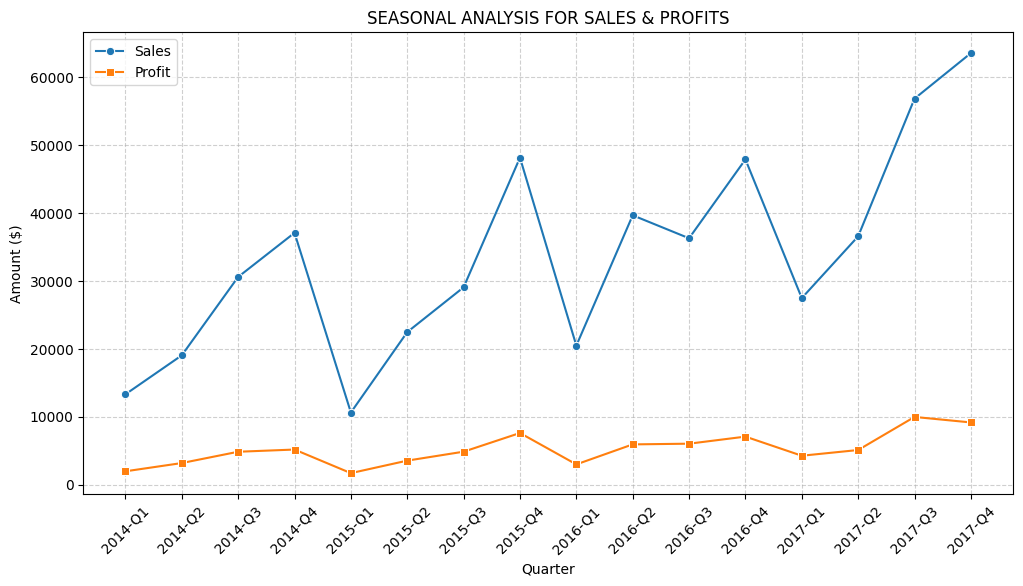

In [48]:
query = """
select 
    concat(year(o.order_date), '-Q', QUARTER(o.order_date)) AS quarter,
    round(sum(od.Sales), 2) as total_sales,
    round(sum(od.Profit), 2) as total_profit
from orders o
join order_details od on o.order_Id = od.order_Id
group by quarter
order by quarter;
"""
df_quarter = pd.read_sql(query, connection)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_quarter, x='quarter', y='total_sales', marker='o', label='Sales')
sns.lineplot(data=df_quarter, x='quarter', y='total_profit', marker='s', label='Profit')
plt.title('SEASONAL ANALYSIS FOR SALES & PROFITS')
plt.xlabel('Quarter')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\3298802666.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_most = pd.read_sql(query, connection)


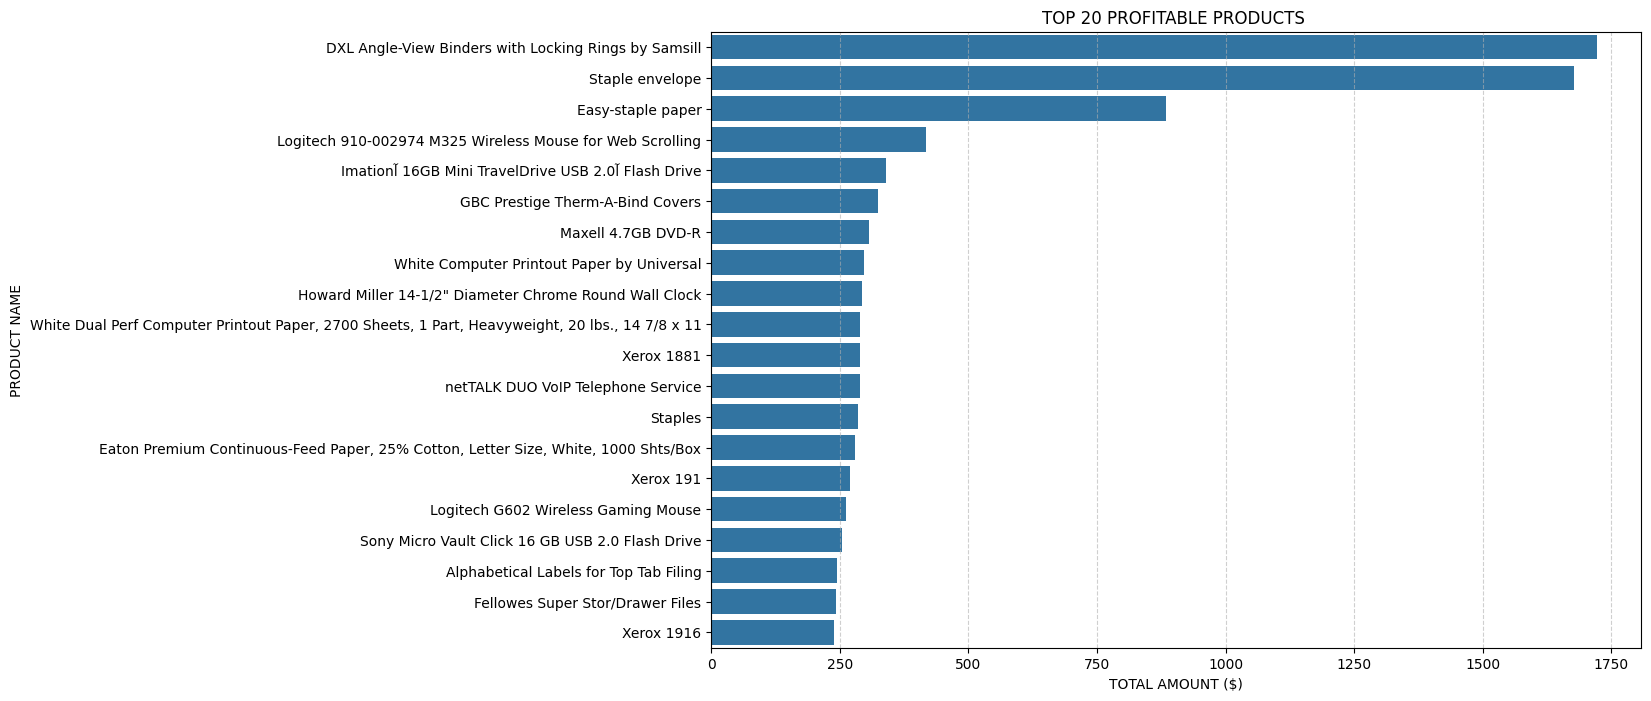

In [50]:
query = """
select
p.product_name,
round(sum(od.profit), 2) as total_profit
from order_details od
join product_d p on od.product_Id = p.product_Id
group by p.product_name
order by total_profit desc
limit 20;
"""
df_most = pd.read_sql(query, connection)
plt.figure(figsize=(12,8))
sns.barplot(data=df_most, y='product_name', x='total_profit')
plt.title('TOP 20 PROFITABLE PRODUCTS ')
plt.xlabel('TOTAL AMOUNT ($)')
plt.ylabel('PRODUCT NAME')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\968678500.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_state = pd.read_sql(query_state, connection)


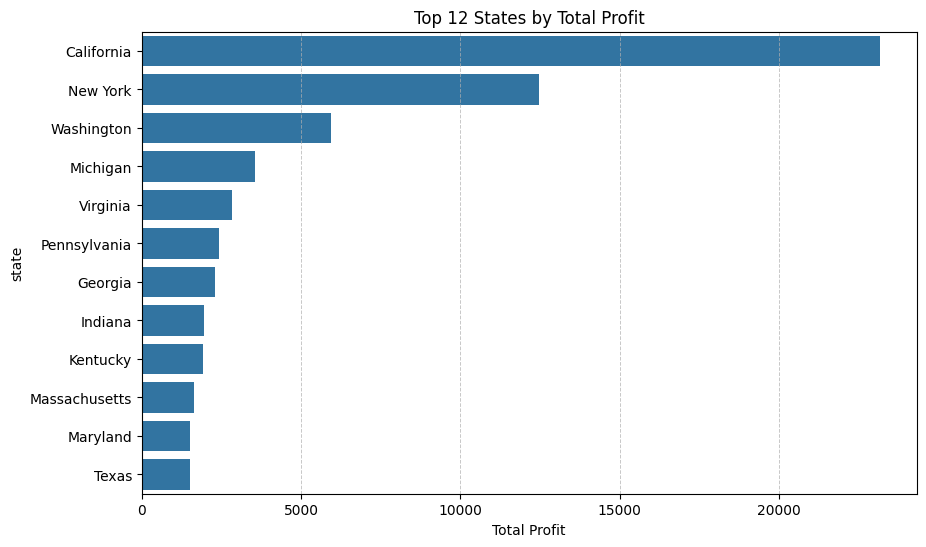

In [55]:
query_state = """
select
a.state,
round(sum(od.profit), 2) as total_profit
from orders o
join order_details od on o.order_Id = od.order_Id
join address a on o.Location_Id = a.Location_Id
group by a.state
order by total_profit desc;
"""
df_state = pd.read_sql(query_state, connection)

plt.figure(figsize=(10,6))
sns.barplot(data=df_state.head(12), y='state', x='total_profit')
plt.grid(axis = "x", linestyle = "--", linewidth = 0.7, alpha = 0.7)
plt.title('Top 12 States by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('state')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\2945132275.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_least = pd.read_sql(query, connection)


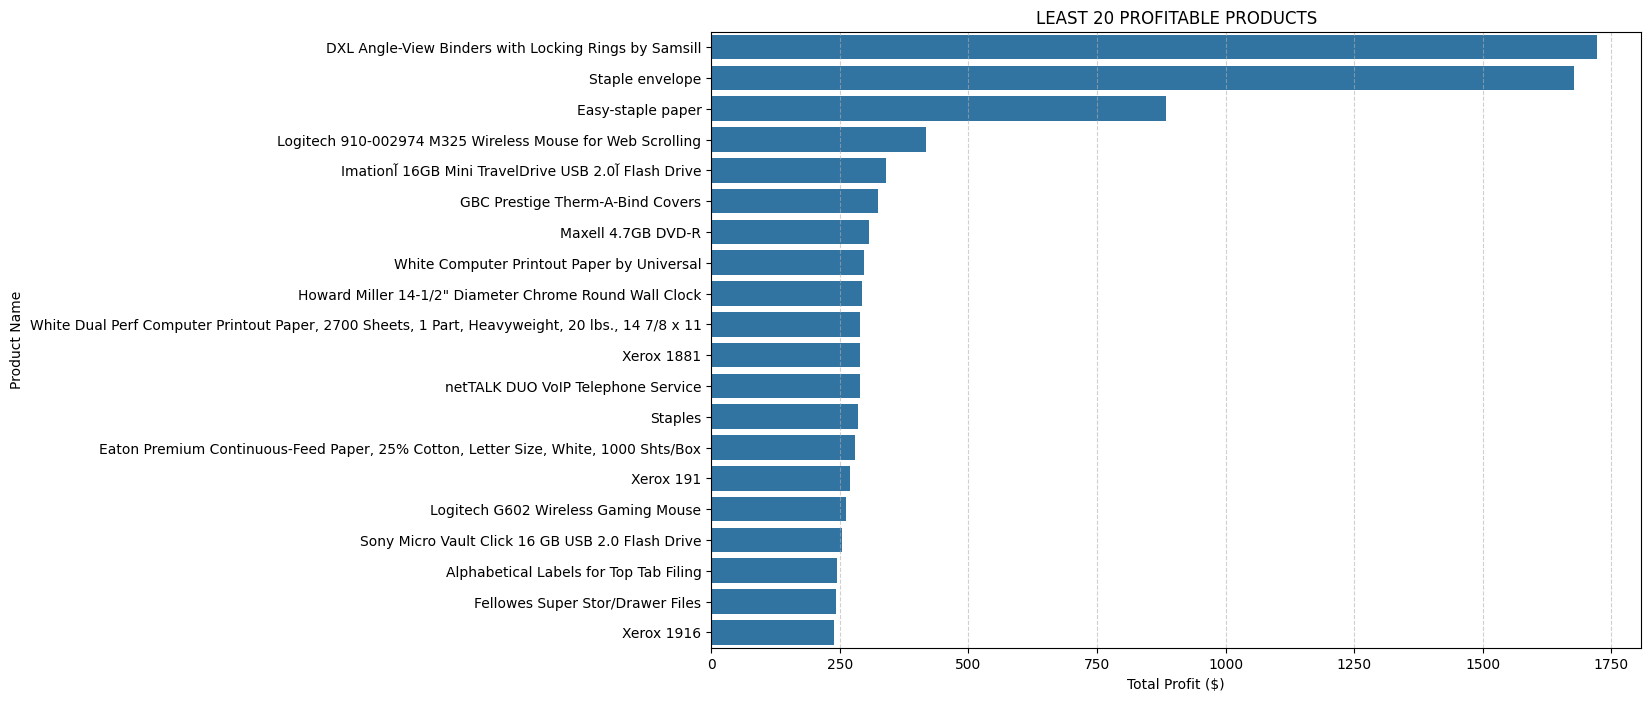

In [57]:
query = """
select
    p.product_name,
    ROUND(SUM(od.profit), 2) as total_profit
from order_details od
join product_d p on od.product_Id = p.product_Id
group by p.product_name
order by total_profit desc
limit 20;
"""
df_least = pd.read_sql(query, connection)
plt.figure(figsize=(12,8))
sns.barplot(data=df_least, y='product_name', x='total_profit')
plt.title('LEAST 20 PROFITABLE PRODUCTS')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17500\1518048690.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_disc = pd.read_sql(query, connection)


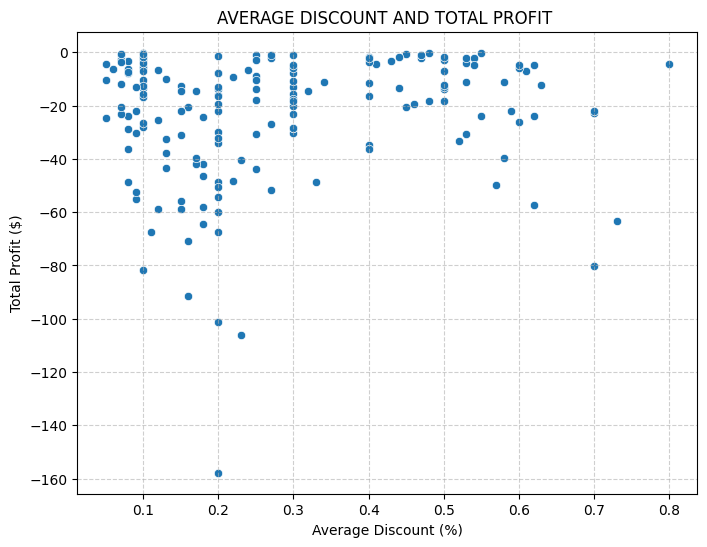

In [58]:
query = """
select
    p.product_name,
    ROUND(avg(od.discount), 2) as avg_discount,
    ROUND(SUM(od.profit), 2) as total_profit
from order_details od
join product_d p on od.product_Id = p.product_Id
group by p.product_name
having total_profit < 0
order by avg_discount desc;
"""
df_disc = pd.read_sql(query, connection)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_disc, x='avg_discount', y='total_profit')
plt.title('AVERAGE DISCOUNT AND TOTAL PROFIT ')
plt.xlabel('Average Discount (%)')
plt.ylabel('Total Profit ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [62]:
pip install plotly.express

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 477.0 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/9.8 MB 477.0 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/9.8 MB 477.0 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/9.8 MB 477.0 kB/s eta 0:00:20
   --- ------------------------------------ 0.8/9.8 MB 352.7 kB/s eta 0:00:26
   --- ------------------------------------ 0.8/9.8 MB 352.7 kB/s eta 0:00:26
   --- ---------------------------------

In [63]:
import plotly.express as px
import json
from urllib.request import urlopen

In [64]:
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as r:
    geo = json.load(r)

In [70]:
pip install us


Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [us]
   -------------------- ------------------- 1/2 [us]
   ---------------------------------------- 2/2 [us]

Note: you may need to restart the kernel to use updated packages.


In [90]:
import plotly.express as px
import pandas as pd
import json
import urllib.request

query = """
SELECT
    b.state,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM orders o
JOIN order_details od ON o.order_Id = od.order_Id
JOIN address b ON o.Location_Id = b.Location_Id
GROUP BY b.state
ORDER BY total_profit DESC;
"""
df_state = pd.read_sql(query, connection)
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
with urllib.request.urlopen(url) as response:
    geo = json.load(response)
fig = px.choropleth(
    df_state,
    geojson=geo,
    locations="state",                  
    featureidkey="properties.name",     
    color="total_profit",
    color_continuous_scale="Greens",
    scope="usa",
    title="Profit Distribution by State"
)
fig.update_layout(
    width=1200,
    height=800,
    coloraxis_colorbar=dict(
        title="Profit ($)",
        tickprefix="$",
        lenmode="fraction",
        len=0.5,
        y=0.5,
        yanchor="middle",
        x=-0.1,
        xanchor="right"
    )
)

fig.show(renderer="iframe_connected")

